In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
df=pd.read_csv("/content/adult_with_headers.csv")

In [77]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [78]:
df.shape

(32561, 15)

In [79]:
df.describe()
#capital_gain and capital_loss contains outliers

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [80]:
df.info()
#no any missing values are present having all proper datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [81]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [82]:
df.duplicated().sum()# 24 duplicate rows are present

24

In [83]:
df.drop_duplicates(inplace=True)#drop duplicates

In [84]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [85]:
df.duplicated().sum()# here no any duplicates are present all duplicates are removed

0

In [86]:
df.reset_index(inplace=True)#index is reseted

In [87]:
df

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [88]:
df.drop(['index'],axis=1,inplace=True)

In [89]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [90]:
df.duplicated().sum()

0

In [91]:
df.shape

(32537, 15)

In [92]:
df['income'].value_counts()

,income
<=50K,24698
>50K,7839


In [93]:
df.select_dtypes(include='number')#selected only numeric columns

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32532,27,257302,12,0,0,38
32533,40,154374,9,0,0,40
32534,58,151910,9,0,0,40
32535,22,201490,9,0,0,20


In [94]:
sc=StandardScaler()# using Standardcaler
sc_df=sc.fit_transform(df.select_dtypes(include='number'))

In [95]:
sc_df#values are ranging from -3 to 3

array([[ 0.03038995, -1.06356884,  1.13477712,  0.14829174, -0.21674317,
        -0.03566374],
       [ 0.8369732 , -1.00866848,  1.13477712, -0.14597544, -0.21674317,
        -2.22248299],
       [-0.0429358 ,  0.24503992, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       ...,
       [ 1.42357919, -0.35877886, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       [-1.2161478 ,  0.11092955, -0.42067868, -0.14597544, -0.21674317,
        -1.65552985],
       [ 0.9836247 ,  0.92981187, -0.42067868,  1.88763548, -0.21674317,
        -0.03566374]])

In [96]:
min_max=MinMaxScaler()#using MinMaxScaler
min_max_df=min_max.fit_transform(df.select_dtypes(include='number'))

In [97]:
min_max_df#values are ranging from 0 to 1

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

I,m moving with the StandardScaler because it is more suitable for the Logistic Regression as i have to use the Logistic regression model

## **Encoding**

In [98]:
df.select_dtypes(include='object')#selected only categorical columns to apply the encoding

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32532,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32533,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32534,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32535,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [99]:
df['workclass'].value_counts()

,workclass
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [100]:
df['education'].value_counts()

,education
HS-grad,10494
Some-college,7282
Bachelors,5353
Masters,1722
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,645
Prof-school,576


In [101]:
df['marital_status'].value_counts()

,marital_status
Married-civ-spouse,14970
Never-married,10667
Divorced,4441
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [102]:
df['occupation'].value_counts()

,occupation
Prof-specialty,4136
Craft-repair,4094
Exec-managerial,4065
Adm-clerical,3768
Sales,3650
Other-service,3291
Machine-op-inspct,2000
?,1843
Transport-moving,1597
Handlers-cleaners,1369


In [103]:
df['relationship'].value_counts()

,relationship
Husband,13187
Not-in-family,8292
Own-child,5064
Unmarried,3445
Wife,1568
Other-relative,981


In [104]:
df['race'].value_counts()

,race
White,27795
Black,3122
Asian-Pac-Islander,1038
Amer-Indian-Eskimo,311
Other,271


In [105]:
df['sex'].value_counts()

,sex
Male,21775
Female,10762


In [106]:
df['native_country'].value_counts()

,native_country
United-States,29153
Mexico,639
?,582
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


In [107]:
df['income'].value_counts()

,income
<=50K,24698
>50K,7839


•	Apply One-Hot Encoding to categorical variables with less than 5 categories.  
•	Use Label Encoding for categorical variables with more than 5 categories.


In [108]:
#ohe=OneHotEncoder()
#ohe_df=ohe.fit_transform(df[['sex']])

In [109]:
#ohe_df

In [110]:
l_encoder=LabelEncoder()
for col in ['workclass', 'education', 'marital_status',
            'occupation', 'relationship', 'race','sex',
            'native_country', 'income']:
    df[col] = l_encoder.fit_transform(df[col])

In [111]:
df['workclass']

,workclass
0,7
1,6
2,4
3,4
4,4
...,...
32532,4
32533,4
32534,4
32535,4


In [112]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32533,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32534,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32535,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [113]:
sc=StandardScaler()# using Standardcaler
sc_df=sc.fit_transform(df)

In [114]:
sc_df

array([[ 0.03038995,  2.14997135, -1.06356884, ..., -0.03566374,
         0.29133547, -0.56337742],
       [ 0.8369732 ,  1.46335725, -1.00866848, ..., -2.22248299,
         0.29133547, -0.56337742],
       [-0.0429358 ,  0.09012905,  0.24503992, ..., -0.03566374,
         0.29133547, -0.56337742],
       ...,
       [ 1.42357919,  0.09012905, -0.35877886, ..., -0.03566374,
         0.29133547, -0.56337742],
       [-1.2161478 ,  0.09012905,  0.11092955, ..., -1.65552985,
         0.29133547, -0.56337742],
       [ 0.9836247 ,  0.77674315,  0.92981187, ..., -0.03566374,
         0.29133547,  1.77500901]])

In [115]:
sc_df1=pd.DataFrame(sc_df,columns=df.columns)

In [116]:
sc_df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,2.149971,-1.063569,-0.335266,1.134777,0.921857,-1.317629,-0.277864,0.393685,0.703020,0.148292,-0.216743,-0.035664,0.291335,-0.563377
1,0.836973,1.463357,-1.008668,-0.335266,1.134777,-0.405919,-0.608318,-0.900126,0.393685,0.703020,-0.145975,-0.216743,-2.222483,0.291335,-0.563377
2,-0.042936,0.090129,0.245040,0.181519,-0.420679,-1.733696,-0.135444,-0.277864,0.393685,0.703020,-0.145975,-0.216743,-0.035664,0.291335,-0.563377
3,1.056950,0.090129,0.425752,-2.402406,-1.198407,-0.405919,-0.135444,-0.900126,-1.962488,0.703020,-0.145975,-0.216743,-0.035664,0.291335,-0.563377
4,-0.776193,0.090129,1.408066,-0.335266,1.134777,-0.405919,0.810304,2.211186,-1.962488,-1.422436,-0.145975,-0.216743,-0.035664,-4.056151,-0.563377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,0.090129,0.639678,-0.852051,0.745913,-0.405919,1.519615,2.211186,0.393685,-1.422436,-0.145975,-0.216743,-0.197650,0.291335,-0.563377
32533,0.103716,0.090129,-0.335436,0.181519,-0.420679,-0.405919,0.100993,-0.900126,0.393685,0.703020,-0.145975,-0.216743,-0.035664,0.291335,1.775009
32534,1.423579,0.090129,-0.358779,0.181519,-0.420679,2.249634,-1.317629,1.588923,0.393685,-1.422436,-0.145975,-0.216743,-0.035664,0.291335,-0.563377
32535,-1.216148,0.090129,0.110930,0.181519,-0.420679,0.921857,-1.317629,0.966661,0.393685,0.703020,-0.145975,-0.216743,-1.655530,0.291335,-0.563377


## **•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

one-hot-encoding:
pros:
1) Good for linear models                
2)No Ordinal Relationship Assumed

**cons**:
1)Creates many new columns (one for each unique category).
2)Produces a sparse matrix with lots of zeros, increasing memory usage.

Label Encoder:
Pros:
1)Replaces categories with numeric labels
2)No increase in feature count.

Cons:
1)Not Suitable for Linear or Distance-Based Models

# **Feature Engineering**

In [117]:
df['age'].value_counts()

,age
36,898
31,888
34,886
23,876
33,875
...,...
83,6
88,3
85,3
86,1


In [118]:
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 30, 50, 100],
                         labels=['Young', 'Middle-aged', 'Senior'])

Rationale:
Income potential often increases with experience and age. Grouping age into bins can help the model detect non-linear relationships between age and income. For example, middle-aged people are more likely to earn >$50K due to career stability and experience.

In [119]:
df['age_group']

,age_group
0,Middle-aged
1,Middle-aged
2,Middle-aged
3,Senior
4,Young
...,...
32532,Young
32533,Middle-aged
32534,Senior
32535,Young


In [120]:
df['age_group'] = l_encoder.fit_transform(df['age_group'])

In [121]:
df['age_group']

,age_group
0,0
1,0
2,0
3,1
4,2
...,...
32532,2
32533,0
32534,1
32535,2


In [122]:
df['total_capital'] = df['capital_gain'] - df['capital_loss']


Rationale:
A person with higher capital gains or lower capital losses typically has stronger financial assets and a higher income level.
This new numerical feature summarizes both investment gains and losses into one meaningful metric that directly relates to income.

In [123]:
df['total_capital']

,total_capital
0,2174
1,0
2,0
3,0
4,0
...,...
32532,0
32533,0
32534,0
32535,0


In [124]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,total_capital
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,0,2174
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,0,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,0,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0,2,0
32533,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1,0,0
32534,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0,1,0
32535,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0,2,0


# **log transformation**

In [125]:
numerical_cols=['age', 'fnlwgt', 'education_num',	'capital_gain',	'capital_loss',	'hours_per_week']

<Axes: >

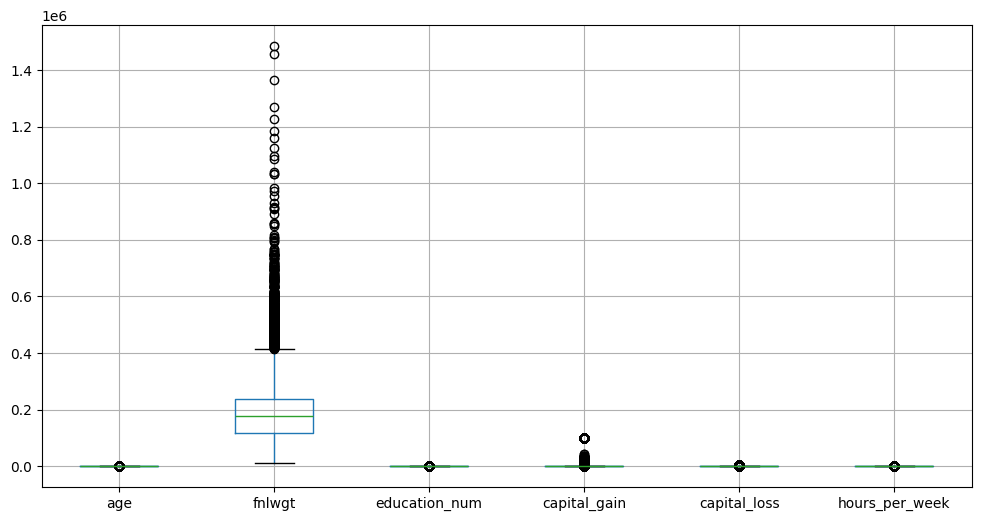

In [126]:
df[numerical_cols].boxplot(figsize=(12,6))

In [127]:
df['fnlwgt'] = np.log1p(df['fnlwgt'])

In [128]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,total_capital
0,39,7,11.258253,9,13,4,1,1,4,1,2174,0,40,39,0,0,2174
1,50,6,11.330348,9,13,2,4,0,4,1,0,0,13,39,0,0,0
2,38,4,12.281398,11,9,0,6,1,4,1,0,0,40,39,0,0,0
3,53,4,12.366157,1,7,2,6,0,2,1,0,0,40,39,0,1,0
4,28,4,12.732013,9,13,2,10,5,2,0,0,0,40,5,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,12.458010,7,12,2,13,5,4,0,0,0,38,39,0,2,0
32533,40,4,11.947140,11,9,2,7,0,4,1,0,0,40,39,1,0,0
32534,58,4,11.931050,11,9,6,1,4,4,0,0,0,40,39,0,1,0
32535,22,4,12.213500,11,9,4,1,3,4,1,0,0,20,39,0,2,0


<Axes: >

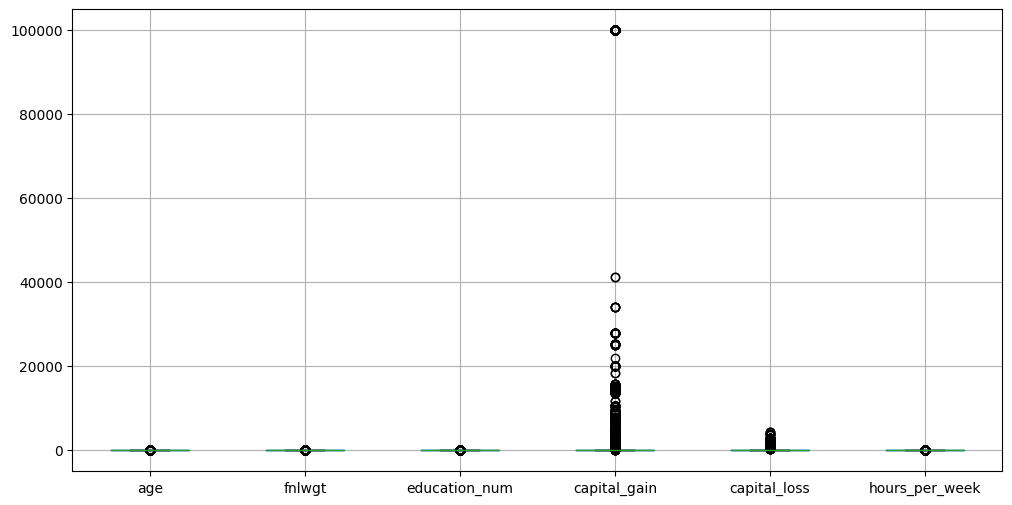

In [129]:
df[numerical_cols].boxplot(figsize=(12,6))

In [130]:
df['capital_gain'] = np.log1p(df['capital_gain'])

<Axes: >

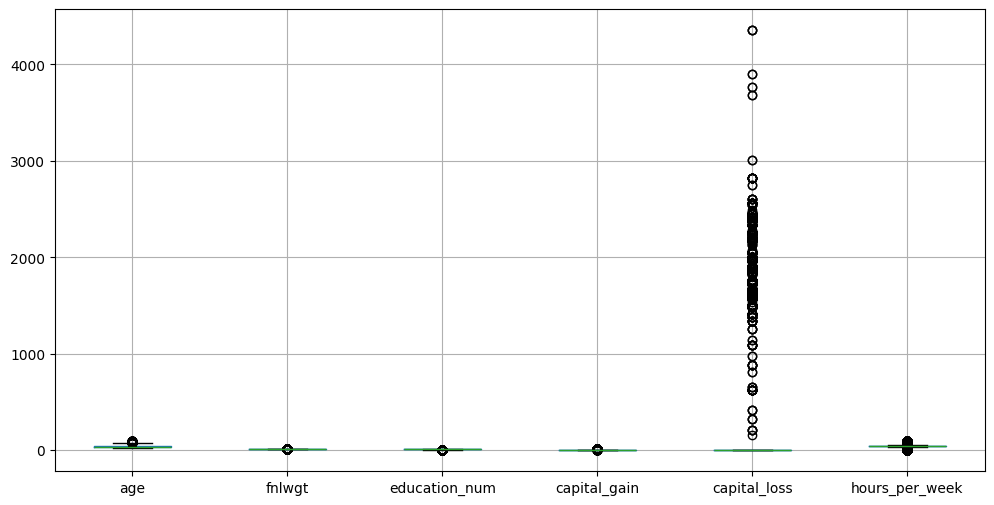

In [131]:
df[numerical_cols].boxplot(figsize=(12,6))

In [132]:
df['capital_loss'] = np.log1p(df['capital_loss'])

<Axes: >

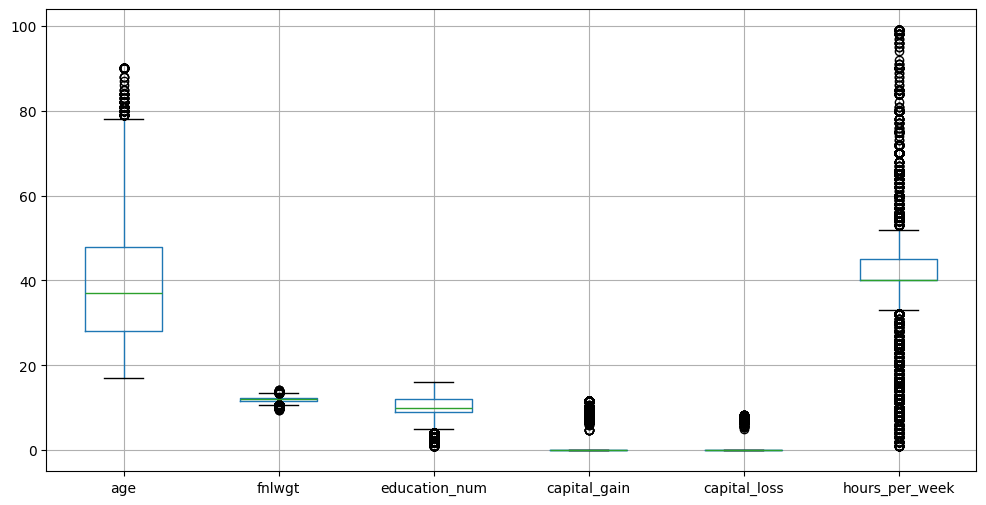

In [133]:
df[numerical_cols].boxplot(figsize=(12,6))

In [134]:
df['hours_per_week'] = np.log1p(df['hours_per_week'])

<Axes: >

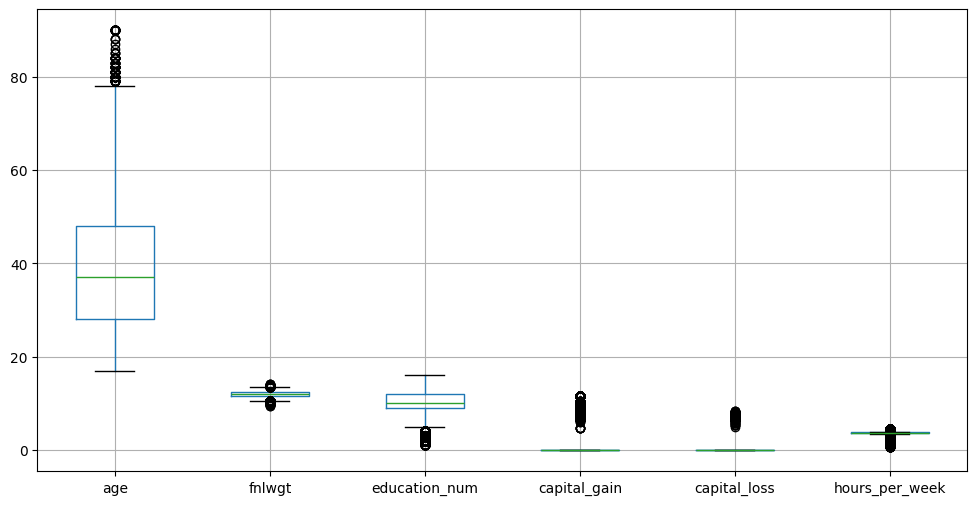

In [135]:
df[numerical_cols].boxplot(figsize=(12,6))

log transformation is used to reduce the skewness of the distribution upto some extent without treating outliers

# **Isolation Forest Algorithm**

In [136]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=10,contamination=0.05)
iso.fit(sc_df1)
out=iso.predict(sc_df1)

In [137]:
out

array([1, 1, 1, ..., 1, 1, 1])

In [138]:
sc_df1['Score']=out
sc_df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Score
0,0.030390,2.149971,-1.063569,-0.335266,1.134777,0.921857,-1.317629,-0.277864,0.393685,0.703020,0.148292,-0.216743,-0.035664,0.291335,-0.563377,1
1,0.836973,1.463357,-1.008668,-0.335266,1.134777,-0.405919,-0.608318,-0.900126,0.393685,0.703020,-0.145975,-0.216743,-2.222483,0.291335,-0.563377,1
2,-0.042936,0.090129,0.245040,0.181519,-0.420679,-1.733696,-0.135444,-0.277864,0.393685,0.703020,-0.145975,-0.216743,-0.035664,0.291335,-0.563377,1
3,1.056950,0.090129,0.425752,-2.402406,-1.198407,-0.405919,-0.135444,-0.900126,-1.962488,0.703020,-0.145975,-0.216743,-0.035664,0.291335,-0.563377,1
4,-0.776193,0.090129,1.408066,-0.335266,1.134777,-0.405919,0.810304,2.211186,-1.962488,-1.422436,-0.145975,-0.216743,-0.035664,-4.056151,-0.563377,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,0.090129,0.639678,-0.852051,0.745913,-0.405919,1.519615,2.211186,0.393685,-1.422436,-0.145975,-0.216743,-0.197650,0.291335,-0.563377,1
32533,0.103716,0.090129,-0.335436,0.181519,-0.420679,-0.405919,0.100993,-0.900126,0.393685,0.703020,-0.145975,-0.216743,-0.035664,0.291335,1.775009,1
32534,1.423579,0.090129,-0.358779,0.181519,-0.420679,2.249634,-1.317629,1.588923,0.393685,-1.422436,-0.145975,-0.216743,-0.035664,0.291335,-0.563377,1
32535,-1.216148,0.090129,0.110930,0.181519,-0.420679,0.921857,-1.317629,0.966661,0.393685,0.703020,-0.145975,-0.216743,-1.655530,0.291335,-0.563377,1


In [139]:
outliers=sc_df1[sc_df1['Score']==-1]
outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Score
4,-0.776193,0.090129,1.408066,-0.335266,1.134777,-0.405919,0.810304,2.211186,-1.962488,-1.422436,-0.145975,-0.216743,-0.035664,-4.056151,-0.563377,-1
14,0.103716,0.090129,-0.644299,-0.593659,0.357049,-0.405919,-0.844755,-0.900126,-3.140575,0.703020,-0.145975,-0.216743,-0.035664,-4.695487,1.775009,-1
27,1.130276,-2.656327,-0.090662,1.215089,-0.031815,-0.405919,-1.554066,-0.900126,-3.140575,0.703020,-0.145975,-0.216743,1.584202,-0.220133,1.775009,-1
52,0.616996,0.090129,-1.306864,0.956696,1.912505,-0.405919,0.810304,2.211186,0.393685,-1.422436,-0.145975,4.501740,1.584202,-2.649611,1.775009,-1
61,-0.482890,-2.656327,0.986740,-1.368836,-2.364998,0.257969,-1.554066,-0.277864,0.393685,0.703020,-0.145975,-0.216743,-0.035664,-4.695487,-0.563377,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32494,1.350253,-1.283099,-0.751873,0.181519,-0.420679,-0.405919,-0.844755,-0.900126,0.393685,0.703020,13.389638,-0.216743,-0.035664,0.291335,1.775009,-1
32501,3.110071,-2.656327,-0.656558,-0.593659,0.357049,-1.733696,-1.554066,1.588923,0.393685,-1.422436,-0.145975,-0.216743,-3.194403,-4.695487,-0.563377,-1
32506,-0.262913,-2.656327,1.234459,-0.335266,1.134777,-0.405919,-1.554066,2.211186,0.393685,-1.422436,-0.145975,-0.216743,1.179236,0.291335,1.775009,-1
32507,-0.629542,-2.656327,-1.477619,-0.335266,1.134777,0.921857,-1.554066,-0.277864,-3.140575,-1.422436,-0.145975,-0.216743,4.742941,0.291335,-0.563377,-1


how outliers can affect model performance.
Model predicts incorrectly for majority of data, Distortion of Statistical Measures. ouliers affects the model accuracy..

Sensitivity in Distance-Based Models

Models like K-Nearest Neighbors (KNN), K-Means clustering, and SVM rely on distance metrics.

Outliers can:

Pull cluster centers toward themselves

Increase distances between normal points

Reduce the model’s ability to generalize

In [140]:
import numpy as np
np.__version__

'1.26.4'

In [141]:
pd.__version__

'1.5.3'

# **PPS Score**

In [142]:
#!pip install numpy==1.26.4 pandas ppscore --upgrade

In [143]:
import ppscore as pps

In [148]:
pps.score(sc_df1,'capital_gain','income')

{'x': 'capital_gain',
 'y': 'income',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.5785168025982159,
 'model_score': 0.7086785355527218,
 'model': DecisionTreeRegressor()}

In [150]:
pps.matrix(sc_df1)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.507545,0.608438,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,0.717506,0.731612,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,0.702724,0.705140,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,0.725309,0.741510,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
251,Score,capital_loss,0.0,regression,True,mean absolute error,0.200218,0.378763,DecisionTreeRegressor()
252,Score,hours_per_week,0.0,regression,True,mean absolute error,0.603481,0.611971,DecisionTreeRegressor()
253,Score,native_country,0.0,regression,True,mean absolute error,0.283047,0.467986,DecisionTreeRegressor()
254,Score,income,0.0,regression,True,mean absolute error,0.578517,0.858943,DecisionTreeRegressor()


In [152]:
df_new=pd.DataFrame(pps.matrix(sc_df1))
df_new[df_new.case!='predict_itself'].sort_values('ppscore',ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
52,education,education_num,1.000000,regression,True,mean absolute error,0.725309,2.472868e-15,DecisionTreeRegressor()
67,education_num,education,1.000000,regression,True,mean absolute error,0.702724,6.467007e-15,DecisionTreeRegressor()
117,relationship,marital_status,0.299790,regression,True,mean absolute error,0.769048,5.384956e-01,DecisionTreeRegressor()
97,occupation,workclass,0.211609,regression,True,mean absolute error,0.507545,4.001440e-01,DecisionTreeRegressor()
80,marital_status,age,0.203737,regression,True,mean absolute error,0.807536,6.430117e-01,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
95,marital_status,Score,0.000000,regression,True,mean absolute error,0.094000,1.765884e-01,DecisionTreeRegressor()
98,occupation,fnlwgt,0.000000,regression,True,mean absolute error,0.717506,7.252752e-01,DecisionTreeRegressor()
99,occupation,education,0.000000,regression,True,mean absolute error,0.702724,7.582763e-01,DecisionTreeRegressor()
101,occupation,marital_status,0.000000,regression,True,mean absolute error,0.769048,8.003128e-01,DecisionTreeRegressor()


PPS = 0 → no predictive power

PPS = 1 → perfect predictive power

relationship and marital_status have 0.299 ppscore it is moderate it means to predict the marital status the relationship columns is 29% effective likewise.

education	and education_num are highly correlated means dependent as it having ppscore as 1.

In [154]:
#sc_df1